In [1]:
from PIL import Image
import cv2
import numpy as np
import time
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
import albumentations
from matplotlib import pyplot as plt
from albumentations.pytorch import ToTensorV2

In [2]:
class AlbumentationsDataset(Dataset):
    """__init__ and __len__ functions are the same as in TorchvisionDataset"""
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]
        
        # Read an image with OpenCV
        image = cv2.imread(file_path)
        
        # By default OpenCV uses BGR color space for color images,
        # so we need to convert the image to RGB color space.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        if self.transform:
            augmented = self.transform(image=image) 
            image = augmented['image']
        return image, label

In [3]:
albumentations_transform = albumentations.Compose([
    albumentations.Resize(512, 384), 
    albumentations.RandomCrop(224, 224),
    albumentations.Normalize(mean=[0.485, 0.456, 0.406],
                                      std=[0.229, 0.224, 0.225]),
    #albumentations.HorizontalFlip(), # Same with transforms.RandomHorizontalFlip()
    ToTensorV2()
])

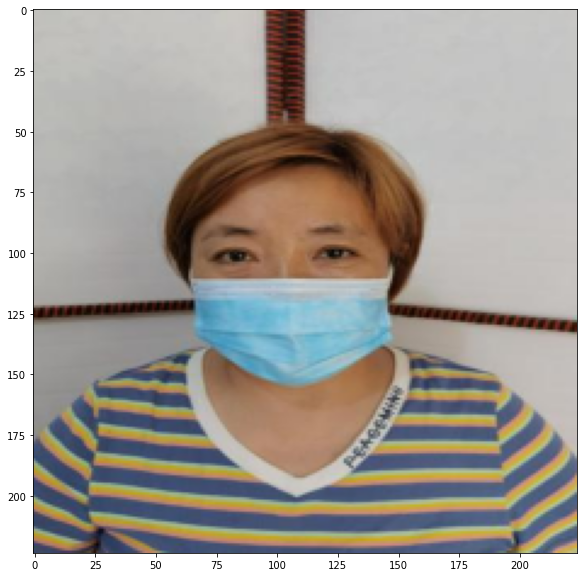

In [6]:
albumentations_dataset = AlbumentationsDataset(
    file_paths=["/opt/ml/input/data/train/images/000001_female_Asian_45/mask2.jpg"],
    labels=[1],
    transform=albumentations_transform,
)

sample, _= albumentations_dataset[0]

plt.figure(figsize=(10, 10))
plt.imshow(transforms.ToPILImage()(sample))
plt.show()